# Newton-Raphson

let
$$
    g(\alpha) = (\alpha^2 - \alpha +1) ^ 2
$$

Then
$$
    g'(\alpha) = 2(\alpha^2 - \alpha + 1)(2\alpha - 1)
$$
$$
    g''(\alpha) = 4(\alpha^2 - \alpha + 1) + 2(2\alpha - 1)^2
$$

In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
g  = np.vectorize(lambda alpha: (alpha ** 2 - alpha + 1) ** 2)
g1 = np.vectorize(lambda alpha: 2 * (alpha ** 2 - alpha + 1) * (2 * alpha - 1))
g2 = np.vectorize(lambda alpha: 4 * (alpha ** 2 - alpha + 1) + 2 * (2 * alpha - 1) ** 2)

We want to minimize $g(\alpha)$

<IPython.core.display.Javascript object>


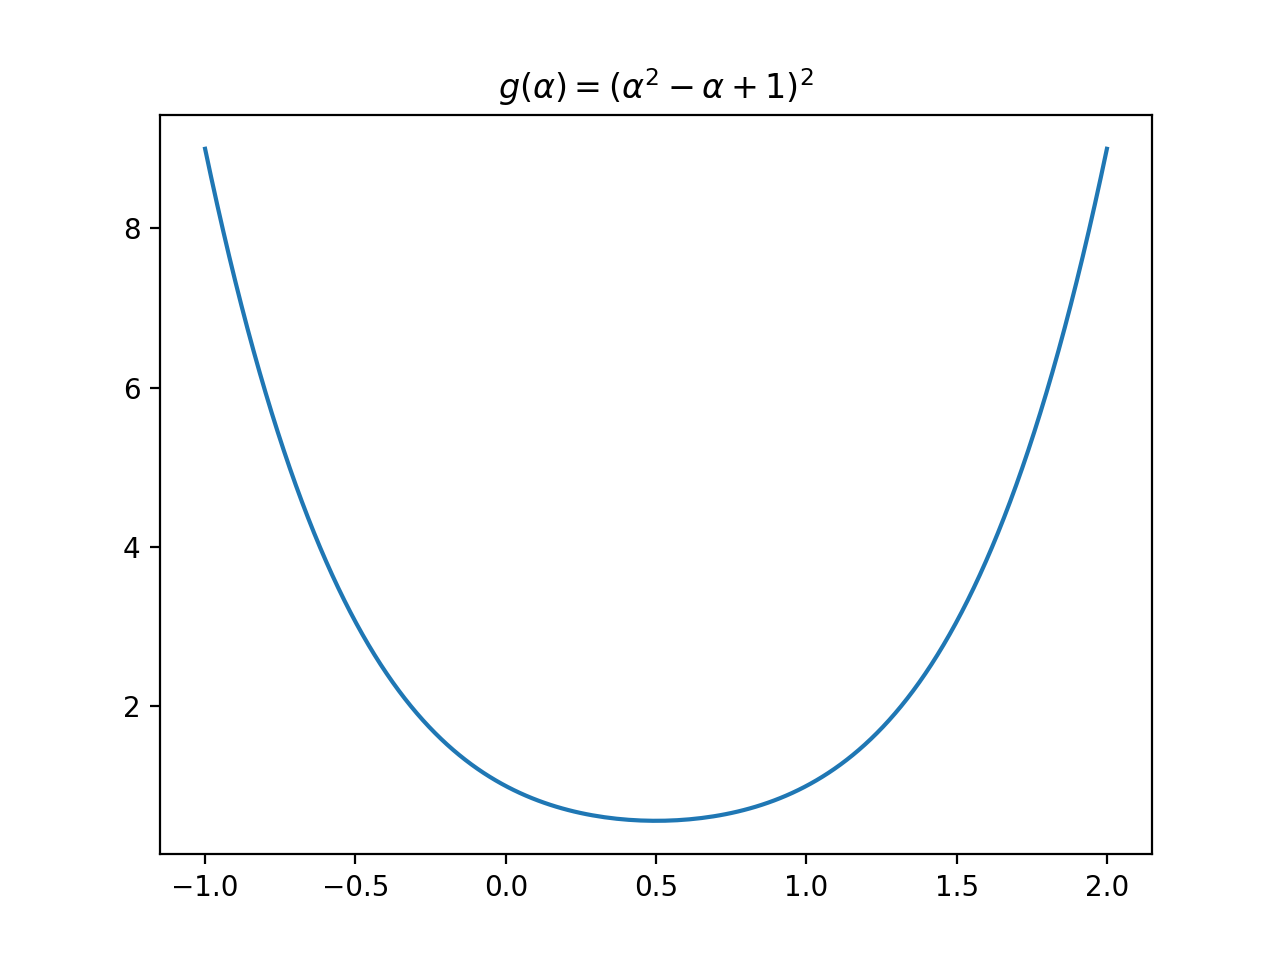

In [7]:
X = np.linspace(-1, 2, 150)
plt.plot(X, g(X))
plt.title(r"$g(\alpha) = (\alpha^2 - \alpha +1) ^ 2$");

By finding where does $g'(\alpha)$ becomes zero.

Enter **Newton-Raphson**

$$
    x_{k+1} = x_k - \frac{g(x_k)}{g'(x_k)}
$$

In [46]:
xk = 1
Xks = [xk]
for i in range(5):
    xk -= g1(xk) / g2(xk)
    Xks.append(xk)
Xks = np.array(Xks)

<IPython.core.display.Javascript object>


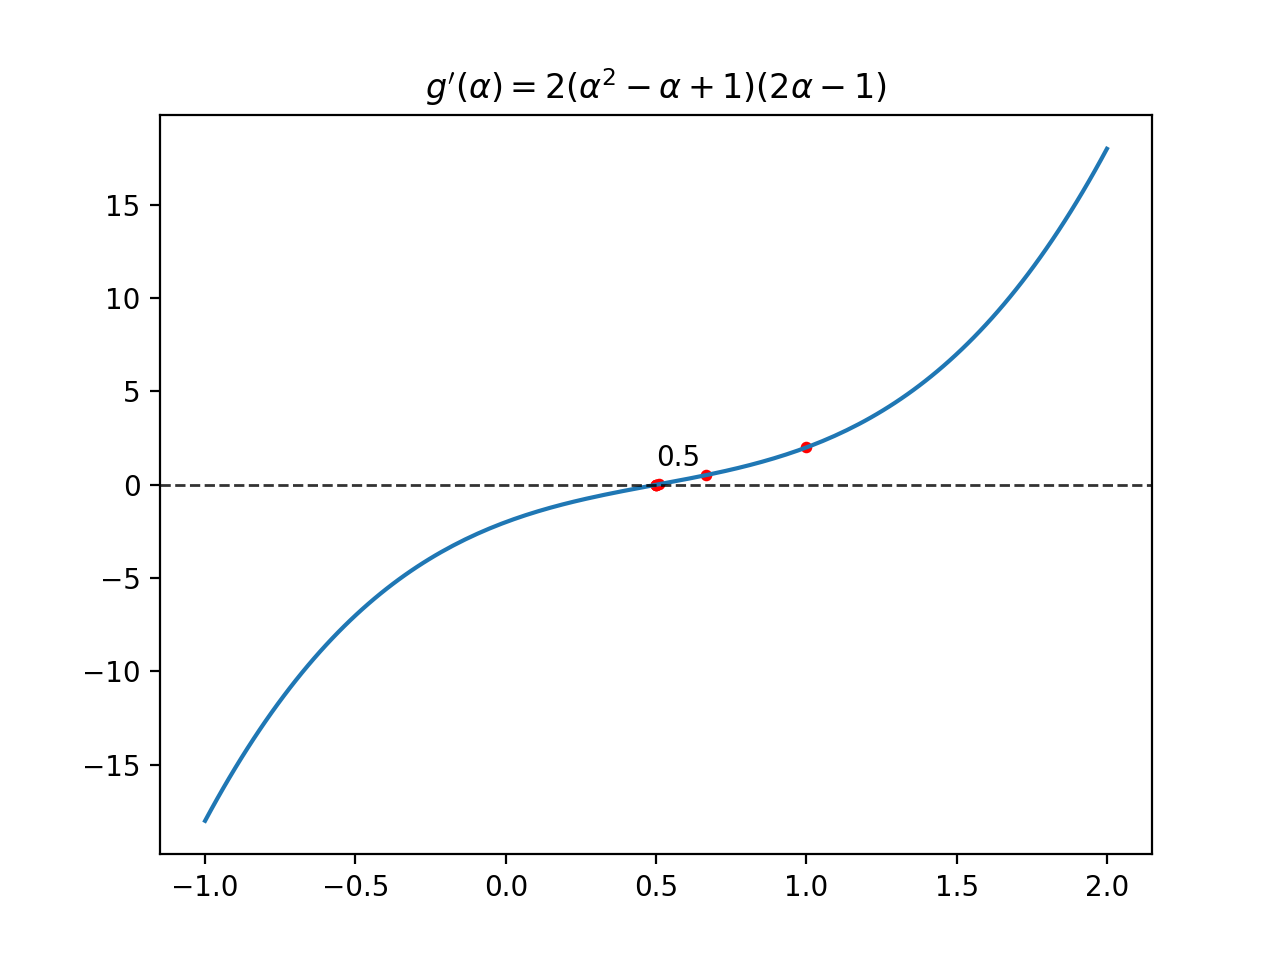

In [49]:
X = np.linspace(-1, 2, 150)
plt.plot(X, g1(X))
plt.scatter(Xks, g1(Xks), s=10, c="red")
plt.title(r"$g'(\alpha) = 2(\alpha^2 - \alpha + 1)(2\alpha - 1)$")
plt.axhline(y=0, linestyle="--", color="black", linewidth=1, alpha=0.8)
plt.text(Xks[-1], g1(Xks[-1]+0.3), Xks[-1]);

In [60]:
vals = {}
for ix, xk in enumerate(Xks):
    cname = "x_{}".format(ix)
    vals[cname] = [xk, g1(xk), g2(xk), xk - g1(xk) / g2(xk)]
nr = pd.DataFrame(vals).T
nr.columns = ["Xk", "g'(Xk)", "g''(Xk)", "Xk+1"]

In [61]:
nr

,Xk,g'(Xk),g''(Xk),Xk+1
x_0,1,2.0,6.0,0.666667
x_1,0.666667,0.5185185185185187,3.3333333333333335,0.511111
x_2,0.511111,0.033338820301783145,3.001481481481481,0.500004
x_3,0.500004,1.0968520346850237e-05,3.000000000160411,0.5
x_4,0.5,3.3306690738754696e-16,3.0,0.5
x_5,0.5,0.0,3.0,0.5
